In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
df_rsumm = pd.read_csv("reviews_hong.csv")
print("reviews_summary : " + str(df_rsumm.shape))
df_rsumm

reviews_summary : (106538, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,17891,37352,2010-04-23,76132,Tamara,The apartment on Holly wood Rd was exactly as ...
1,17891,56688,2010-06-24,97136,Wendy,"Apartment was perfect - stylish, spacious and..."
2,17891,76243,2010-08-09,163312,Angela,We loved staying here for the weekend. The apa...
3,17891,93590,2010-09-09,148333,Jennifer,An awesome loft that looks just like it does i...
4,17891,108082,2010-09-29,218702,Matt,"Candace was great, she prepared the loft with ..."
...,...,...,...,...,...,...
106533,52291882,462582323233712490,2021-09-30,423649352,Michael,"The apartment was clean and tidy, with a relax..."
106534,52485671,471342973913927086,2021-10-12,106114071,EmMa,長洲難得高質素渡假屋 整潔度滿分 空間極大 設施齊備 下次都會再選擇 距離碼頭只需1分鐘 非...
106535,52656625,476909105131331729,2021-10-19,286757660,琪瑶,"在这里住了五天,总体感受非常非常非常棒,是很值得推荐的一家民宿!<br/> 1.地理位..."
106536,52656625,477294259279615830,2021-10-20,426466967,(Hidden by Airbnb) 用户,系统自动评论:该房东在房客入住 5 天前单方面取消了订单｡


In [2]:
import datetime
def mapper(month):
    date = datetime.datetime(2000, month, 1)  # You need a dateobject with the proper month
    return date.strftime('%b') 

In [3]:
df_rsumm['date'] = pd.to_datetime(df_rsumm['date'])
df_rsumm['year'] = df_rsumm['date'].dt.year
df_rsumm['month'] = df_rsumm['date'].dt.month
df_rsumm['day'] = df_rsumm['date'].dt.day

df_rsumm['year'] = df_rsumm['year'].astype(int)
df_rsumm['month'] = df_rsumm['month'].astype(int)
df_rsumm['day'] = df_rsumm['day'].astype(int)
df_rsumm.sort_values(['year', 'month'], ascending=[True, True],axis=0,inplace=True)

In [4]:
df_rsumm['month'] = df_rsumm['month'].apply(mapper)

In [5]:
df_rsumm_orig = df_rsumm.copy(deep=False) 

In [6]:
dropped = ['reviewer_name','comments']
df_rsumm.drop(dropped,axis=1,inplace=True)

In [7]:
df_rsumm['year'].value_counts()

2019    28187
2018    26763
2017    18598
2016    10592
2020     7969
2021     6837
2015     4743
2014     1678
2013      753
2012      300
2011      110
2010        8
Name: year, dtype: int64

In [8]:
df_2019 = df_rsumm[df_rsumm['year'] == 2019]
df_2018 = df_rsumm[df_rsumm['year'] == 2018]
df_2017 = df_rsumm[df_rsumm['year'] == 2017]
df_2020 = df_rsumm[df_rsumm['year'] == 2020]

In [9]:
dropped = ['year','day','id','date','listing_id']
df_2019.drop(dropped,axis=1,inplace=True)
df_2018.drop(dropped,axis=1,inplace=True)
df_2017.drop(dropped,axis=1,inplace=True)
df_2020.drop(dropped,axis=1,inplace=True)

D:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
df_2020["count"] = df_2020.groupby("month")["reviewer_id"].transform('count')
df_2019["count"] = df_2019.groupby("month")["reviewer_id"].transform('count')
df_2018["count"] = df_2018.groupby("month")["reviewer_id"].transform('count')
df_2017["count"] = df_2017.groupby("month")["reviewer_id"].transform('count')

<ipython-input-10-9a2a7c08a516>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020["count"] = df_2020.groupby("month")["reviewer_id"].transform('count')
<ipython-input-10-9a2a7c08a516>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019["count"] = df_2019.groupby("month")["reviewer_id"].transform('count')
<ipython-input-10-9a2a7c08a516>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [11]:
dropped = ['reviewer_id']
df_2020.drop(dropped,axis=1,inplace=True)
df_2019.drop(dropped,axis=1,inplace=True)
df_2018.drop(dropped,axis=1,inplace=True)
df_2017.drop(dropped,axis=1,inplace=True)
df_2020 = df_2020.drop_duplicates()
df_2019 = df_2019.drop_duplicates()
df_2018 = df_2018.drop_duplicates()
df_2017 = df_2017.drop_duplicates()
df_2020=df_2020.reset_index(drop=True)
df_2019=df_2019.reset_index(drop=True)
df_2018=df_2018.reset_index(drop=True)
df_2017=df_2017.reset_index(drop=True)

df_2020

,month,count
0,Jan,1490
1,Feb,621
2,Mar,485
3,Apr,466
4,May,504
5,Jun,499
6,Jul,647
7,Aug,631
8,Sep,581
9,Oct,701


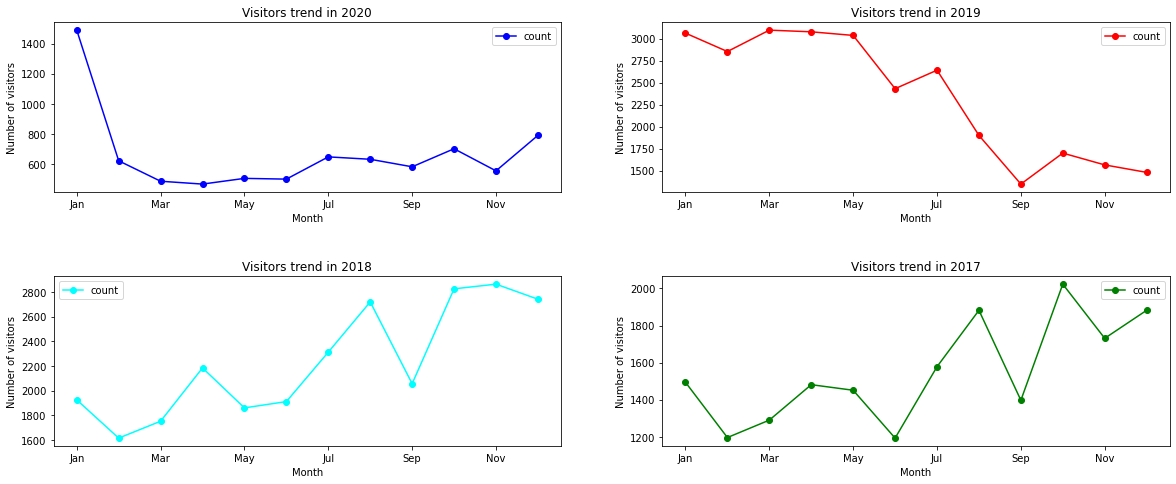

In [12]:

fig = plt.figure(figsize=(20, 6))
ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

df_2020.plot(kind='line', color='blue', x='month',y='count',marker='o',ax=ax0) # add to subplot 1
ax0.set_title('Visitors trend in 2020')
ax0.set_xlabel('Month')
ax0.set_ylabel('Number of visitors')

df_2019.plot(kind='line', color='red', x='month',y='count',marker='o',ax=ax1) # add to subplot 2
ax1.set_title('Visitors trend in 2019')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of visitors')

df_2018.plot(kind='line', color='cyan', x='month',y='count',marker='o',ax=ax2) # add to subplot 3
ax2.set_title('Visitors trend in 2018')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of visitors')

df_2017.plot(kind='line', color='green', x='month',y='count',marker='o',ax=ax3) # add to subplot 4
ax3.set_title('Visitors trend in 2017')
ax3.set_xlabel('Month')
ax3.set_ylabel('Number of visitors')

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5)
plt.show()

we can see october is the most demanded season 2018-2017 
ans january is demand season in 2019-20
januray to march is the off season in 2017-18
for 2019 its sep to dec
for 2020 its feb to nov